In [1]:
import pandas as pd
import numpy as np
import os
from ast import literal_eval
import matplotlib.pyplot as plt
import random as rd

# paper being analyzed: https://www.nature.com/articles/s41586-023-07004-5#Sec3

## some direct definitions from this paper:

### 1. lambda : average residue stickiness: 'measurement of the strength of attractive intra-chain interactions relative to solvent–protein interactions'
### 2. SHD: sequence hyrdropathy decoration: 'quantified the patterning of hydrophobic residues'
### 3. kappa and SCD capture different aspects of how uniformly the charge residues are distributed along the chain. For fixed sequence composition and length, more pronounced charge segregation is indicated by increasing κ values and decreasing SCD values. The κ parameter is normalized on the basis of the composition of each sequence and ranges from 0 to 1, whereas SCD values correlate with the absolute net charge of the sequences. Therefore, κ and SCD are both influenced by sequence length and composition.This limitation is overcome by the z-scores calculated with the NARDINI method38, which quantify the deviation of the patterning parameters of a given sequence from a distribution obtained from scrambled sequences of the same composition and length. Specifically, we turn to z-scores for estimating the segregation between positively and negatively charged residues, z(δ+−), and the clustering of negatively charged, z(Ω−), and aromatic residues, z(Ωπ), with respect to all other residues


# generate a dataframe connecting directory with seq_name in their property df

In [2]:
%%time
seq_name_list = []
seq_name_dir = []
protein_name = []
for root, dirs, files in os.walk('IDROME_larsen/IDRome_v4/', topdown=False):
    for name in files:
        seq_name_list.append(''.join(root.split('/')[2:(len(root.split('/'))-1)]+['_']+[root.split('/')[len(root.split('/'))-1]]))
        protein_name.append(''.join(root.split('/')[2:(len(root.split('/'))-1)]))
        seq_name_dir.append(root)
        break
seq_name_dir_df = pd.DataFrame(zip(seq_name_list,seq_name_dir,protein_name),columns=['seq_name','seq_dir','protein_uniprot_id'])
del seq_name_list, seq_name_dir, protein_name
seq_name_dir_df

CPU times: user 214 ms, sys: 970 ms, total: 1.18 s
Wall time: 1.62 s


,seq_name,seq_dir,protein_uniprot_id
0,H0YL14_1_46,IDROME_larsen/IDRome_v4/H0/YL/14/1_46,H0YL14
1,H0YL09_1_131,IDROME_larsen/IDRome_v4/H0/YL/09/1_131,H0YL09
2,H0YKK7_1_89,IDROME_larsen/IDRome_v4/H0/YK/K7/1_89,H0YKK7
3,H0YKK7_135_164,IDROME_larsen/IDRome_v4/H0/YK/K7/135_164,H0YKK7
4,H0YKK7_430_550,IDROME_larsen/IDRome_v4/H0/YK/K7/430_550,H0YKK7
...,...,...,...
28053,A3QJZ6_111_153,IDROME_larsen/IDRome_v4/A3/QJ/Z6/111_153,A3QJZ6
28054,A3QJZ7_106_152,IDROME_larsen/IDRome_v4/A3/QJ/Z7/106_152,A3QJZ7
28055,A3KN83_1001_1044,IDROME_larsen/IDRome_v4/A3/KN/83/1001_1044,A3KN83
28056,A3KN83_1_250,IDROME_larsen/IDRome_v4/A3/KN/83/1_250,A3KN83


In [3]:
#this is tau protein according to uniprot
seq_name_dir_df[seq_name_dir_df.protein_uniprot_id=='P10636']

,seq_name,seq_dir,protein_uniprot_id
659,P10636_1_758,IDROME_larsen/IDRome_v4/P1/06/36/1_758,P10636


In [4]:
#this is ab protein according to uniprot
seq_name_dir_df[seq_name_dir_df.protein_uniprot_id=='P05067']

,seq_name,seq_dir,protein_uniprot_id
10188,P05067_1_33,IDROME_larsen/IDRome_v4/P0/50/67/1_33,P05067
10189,P05067_342_382,IDROME_larsen/IDRome_v4/P0/50/67/342_382,P05067
10190,P05067_186_287,IDROME_larsen/IDRome_v4/P0/50/67/186_287,P05067
10191,P05067_570_770,IDROME_larsen/IDRome_v4/P0/50/67/570_770,P05067


In [8]:
#this is human P1 protamine protein according to uniprot
seq_name_dir_df[seq_name_dir_df.protein_uniprot_id=='P04553']

,seq_name,seq_dir,protein_uniprot_id
10219,P04553_1_51,IDROME_larsen/IDRome_v4/P0/45/53/1_51,P04553


# look at the property information from their github

In [3]:
df_idrome_conf = pd.read_csv('conf_prop.csv.gz',index_col=0)
# df_idrome_conf.nu = df_idrome_conf.nu.apply(lambda x: round(x,3))
# conf_prop = ['nu', 'ete2_Rg2', 'S', 'Delta', 'Rg', 'ete', 'rh', 'SPR']

# for seq_name in df_idrome.index:
#     df_idrome.loc[seq_name,conf_prop] = df_idrome_conf.loc[seq_name,conf_prop]

In [4]:
# load IDRome database
df_idrome = pd.read_csv('IDRome_DB.csv',index_col=0)
# load data from five independent MD simulations of 33 sequences
df_replicas = pd.read_csv('replicas_data.csv',index_col=0)


In [5]:
df_idrome

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,gene_name,QCDpred,z_delta_+-,z_omega_pi,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr
seq_name,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1_145_181,A0A024RBG1,37,0.558,10.284649,6.304027,0.933961,0.225950,1.606561,3.843011,1.403521,...,NUDT4B,0.254463,0.000000,0.000000,0.000000,0.000000,-0.531910,0.000000,0.565,10.288
A0A075B6T7_1_32,A0A075B6T7,32,0.525,10.092351,6.114494,0.901807,0.212670,1.448141,3.390487,1.308675,...,TRAV6,0.659342,0.000000,0.054230,-0.043142,0.000000,0.061436,0.000000,0.532,10.107
A0A087WTH1_1_67,A0A087WTH1,67,0.532,10.160125,6.069995,0.822738,0.199126,2.243991,5.283533,1.849274,...,TMEM265,0.661272,-1.094918,0.000000,0.384885,2.281943,1.092688,0.298507,0.537,10.167
A0A087WTH5_1_132,A0A087WTH5,132,0.496,10.049124,6.150972,0.798438,0.188978,3.034005,7.119714,2.471343,...,KCNE1B,0.445861,0.000000,-0.463316,0.799692,0.000000,0.627563,0.000000,0.509,10.018
A0A087WV53_1_46,A0A087WV53,46,0.567,10.212765,6.439589,0.882210,0.214786,1.882622,4.607908,1.582147,...,SPEGNB,0.313998,0.000000,0.000000,1.947253,0.000000,0.090132,0.369565,0.578,10.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Z4_1_181,Q9Y6Z4,181,0.493,10.006512,5.748098,0.799905,0.210890,3.791956,8.607822,2.953329,...,KIF25-AS1,0.396007,0.000000,0.000000,-1.319891,0.000000,0.163169,0.000000,0.520,9.993
Q9Y6Z5_1_254,Q9Y6Z5,254,0.528,9.830710,6.153759,0.896173,0.221422,4.586832,10.808776,3.457226,...,AFDN-DT,0.374082,0.000000,0.000000,-2.182869,0.000000,2.214949,0.000000,0.537,9.984
Q9Y6Z7_1_109,Q9Y6Z7,109,0.546,10.025622,6.175505,0.935857,0.216970,3.011145,7.113405,2.351117,...,COLEC10,0.232155,0.106768,0.000000,0.451957,2.132808,1.114749,0.513761,0.513,10.072


In [6]:
df_idrome_conf


,nu,nu_err,S,S_err,Delta,Delta_err,ete2_Rg2,ete2_Rg2_err,Rg,Rg_err,ete,ete_err,rh,rh_err,R0,R0_err,SPR,SPR_err
seq_name,,,,,,,,,,,,,,,,,,
A0A024RBG1_145_181,0.558,0.004400,0.933961,0.084659,0.225950,0.014180,6.304027,0.170574,1.606561,0.009660,3.843011,0.047135,1.403521,0.003884,0.560582,0.007854,10.284649,0.0
A0A075B6T7_1_32,0.525,0.003618,0.901807,0.081148,0.212670,0.012726,6.114494,0.167751,1.448141,0.009249,3.390487,0.043188,1.308675,0.003810,0.599697,0.006589,10.092351,0.0
A0A087WTH1_1_67,0.532,0.001405,0.822738,0.083602,0.199126,0.012490,6.069995,0.167972,2.243991,0.016985,5.283533,0.062448,1.849274,0.005888,0.609978,0.003217,10.160125,0.0
A0A087WTH5_1_132,0.496,0.001813,0.798438,0.116139,0.188978,0.019895,6.150972,0.272686,3.034005,0.033206,7.119714,0.147132,2.471343,0.013120,0.674999,0.005398,10.049124,0.0
A0A087WV53_1_46,0.567,0.001539,0.882210,0.063706,0.214786,0.011787,6.439589,0.147974,1.882622,0.011304,4.607908,0.046243,1.582147,0.004592,0.560475,0.002931,10.212765,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Z4_1_181,0.493,0.001942,0.799905,0.115611,0.210890,0.025691,5.748098,0.270645,3.791956,0.045258,8.607822,0.172981,2.953329,0.016237,0.723369,0.006632,10.006512,0.0
Q9Y6Z5_1_254,0.528,0.000551,0.896173,0.116349,0.221422,0.019193,6.153759,0.232020,4.586832,0.046815,10.808776,0.175821,3.457226,0.016371,0.629167,0.001760,9.830710,0.0
Q9Y6Z7_1_109,0.546,0.001817,0.935857,0.109836,0.216970,0.016440,6.175505,0.213423,3.011145,0.026954,7.113405,0.110314,2.351117,0.009673,0.601631,0.004635,10.025622,0.0


In [16]:
combined_df_idrome = pd.concat([df_idrome,df_idrome_conf],axis=1).copy()
#drop duplicate columns
combined_df_idrome = combined_df_idrome.loc[:,~combined_df_idrome.columns.duplicated()].copy()
combined_df_idrome

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,ete2_Rg2_err,Rg,Rg_err,ete,ete_err,rh,rh_err,R0,R0_err,SPR_err
seq_name,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1_145_181,A0A024RBG1,37,0.558,10.284649,6.304027,0.933961,0.225950,1.606561,3.843011,1.403521,...,0.170574,1.606561,0.009660,3.843011,0.047135,1.403521,0.003884,0.560582,0.007854,0.0
A0A075B6T7_1_32,A0A075B6T7,32,0.525,10.092351,6.114494,0.901807,0.212670,1.448141,3.390487,1.308675,...,0.167751,1.448141,0.009249,3.390487,0.043188,1.308675,0.003810,0.599697,0.006589,0.0
A0A087WTH1_1_67,A0A087WTH1,67,0.532,10.160125,6.069995,0.822738,0.199126,2.243991,5.283533,1.849274,...,0.167972,2.243991,0.016985,5.283533,0.062448,1.849274,0.005888,0.609978,0.003217,0.0
A0A087WTH5_1_132,A0A087WTH5,132,0.496,10.049124,6.150972,0.798438,0.188978,3.034005,7.119714,2.471343,...,0.272686,3.034005,0.033206,7.119714,0.147132,2.471343,0.013120,0.674999,0.005398,0.0
A0A087WV53_1_46,A0A087WV53,46,0.567,10.212765,6.439589,0.882210,0.214786,1.882622,4.607908,1.582147,...,0.147974,1.882622,0.011304,4.607908,0.046243,1.582147,0.004592,0.560475,0.002931,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Z4_1_181,Q9Y6Z4,181,0.493,10.006512,5.748098,0.799905,0.210890,3.791956,8.607822,2.953329,...,0.270645,3.791956,0.045258,8.607822,0.172981,2.953329,0.016237,0.723369,0.006632,0.0
Q9Y6Z5_1_254,Q9Y6Z5,254,0.528,9.830710,6.153759,0.896173,0.221422,4.586832,10.808776,3.457226,...,0.232020,4.586832,0.046815,10.808776,0.175821,3.457226,0.016371,0.629167,0.001760,0.0
Q9Y6Z7_1_109,Q9Y6Z7,109,0.546,10.025622,6.175505,0.935857,0.216970,3.011145,7.113405,2.351117,...,0.213423,3.011145,0.026954,7.113405,0.110314,2.351117,0.009673,0.601631,0.004635,0.0


In [17]:
combined_df_idrome.sort_values(by='nu')

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,ete2_Rg2_err,Rg,Rg_err,ete,ete_err,rh,rh_err,R0,R0_err,SPR_err
seq_name,,,,,,,,,,,,,,,,,,,,,
Q86SE8_129_214,Q86SE8,86,0.065,10.260482,3.107066,0.314455,0.113370,1.912174,3.089510,1.812823,...,0.126481,1.912174,0.009087,3.089510,0.055905,1.812823,0.004276,2.266979,0.184336,0.0
Q5JTH9_1043_1297,Q5JTH9,255,0.086,9.929288,2.543884,0.402369,0.116119,3.149610,4.620003,2.870293,...,0.160919,3.149610,0.019976,4.620003,0.112039,2.870293,0.008460,3.041934,0.206650,0.0
Q8WTT2_1_202,Q8WTT2,202,0.107,10.082064,2.377026,0.506800,0.131237,2.954646,4.047480,2.695877,...,0.187671,2.954646,0.021961,4.047480,0.112949,2.695877,0.009238,2.705215,0.180483,0.0
P26583_163_209,P26583,47,0.130,10.454322,3.622290,0.643660,0.167728,1.529460,2.629455,1.428964,...,0.146151,1.529460,0.007584,2.629455,0.049445,1.428964,0.003382,1.631247,0.137547,0.0
Q5HYW3_413_569,Q5HYW3,157,0.148,10.014163,4.033625,0.398007,0.123606,2.526162,4.687739,2.310858,...,0.190288,2.526162,0.015959,4.687739,0.108570,2.310858,0.006869,2.078350,0.127021,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q7Z6M4_332_381,Q7Z6M4,50,0.689,11.370868,7.232934,1.166463,0.271707,2.890174,7.582918,2.039336,...,0.117694,2.890174,0.011939,7.582918,0.061031,2.039336,0.003204,0.557798,0.018003,0.0
Q9UGP8_723_760,Q9UGP8,38,0.694,11.137942,7.441267,1.115712,0.251821,2.182393,5.807790,1.670996,...,0.124638,2.182393,0.009317,5.807790,0.046132,1.670996,0.003070,0.499419,0.008190,0.0
Q8TBB5_486_520,Q8TBB5,35,0.701,10.891231,7.319404,1.098475,0.262309,2.035894,5.388077,1.571664,...,0.121841,2.035894,0.008719,5.388077,0.041663,1.571664,0.002636,0.475889,0.007870,0.0


In [28]:
combined_df_idrome[(combined_df_idrome.nu>=0.7 & (combined_df_idrome.nu<=0.77)]

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,ete2_Rg2_err,Rg,Rg_err,ete,ete_err,rh,rh_err,R0,R0_err,SPR_err
seq_name,,,,,,,,,,,,,,,,,,,,,
A0A1B0GVG4_195_234,A0A1B0GVG4,40,0.621,10.267636,6.521040,1.004692,0.236908,1.935114,4.765392,1.563806,...,0.132010,1.935114,0.009724,4.765392,0.044977,1.563806,0.003607,0.527623,0.008644,0.0
A0A494C086_275_341,A0A494C086,67,0.634,10.405330,6.856812,0.998993,0.238593,2.877655,7.308922,2.159517,...,0.142236,2.877655,0.014679,7.308922,0.071142,2.159517,0.004943,0.551992,0.008616,0.0
A1L162_127_156,A1L162,30,0.670,10.741083,7.370404,1.070947,0.245210,1.681280,4.442420,1.406349,...,0.167447,1.681280,0.009446,4.442420,0.047101,1.406349,0.003086,0.493687,0.011510,0.0
A1L162_1_53,A1L162,53,0.625,10.541287,7.030604,0.957980,0.218913,2.338349,5.968055,1.843472,...,0.164567,2.338349,0.011967,5.968055,0.063556,1.843472,0.004350,0.539403,0.004172,0.0
A6NIV6_521_560,A6NIV6,40,0.630,10.346727,6.778457,1.021086,0.247759,1.998726,5.035246,1.607996,...,0.134291,1.998726,0.008761,5.035246,0.043805,1.607996,0.003381,0.539185,0.011326,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9ULW6_167_237,Q9ULW6,71,0.649,10.759470,7.042230,0.973041,0.229288,3.288213,8.463781,2.371676,...,0.139052,3.288213,0.015625,8.463781,0.079227,2.371676,0.003877,0.578884,0.011875,0.0
Q9UNT1_197_228,Q9UNT1,32,0.639,10.563378,6.910776,1.043226,0.245916,1.714415,4.364825,1.431436,...,0.143232,1.714415,0.009274,4.364825,0.042334,1.431436,0.003560,0.520647,0.012165,0.0
Q9UPY3_1769_1805,Q9UPY3,37,0.638,10.623881,7.137063,1.051140,0.251266,1.829182,4.717144,1.527637,...,0.162937,1.829182,0.010285,4.717144,0.049544,1.527637,0.003626,0.510611,0.003926,0.0


/tmp/ipykernel_233289/1428735381.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


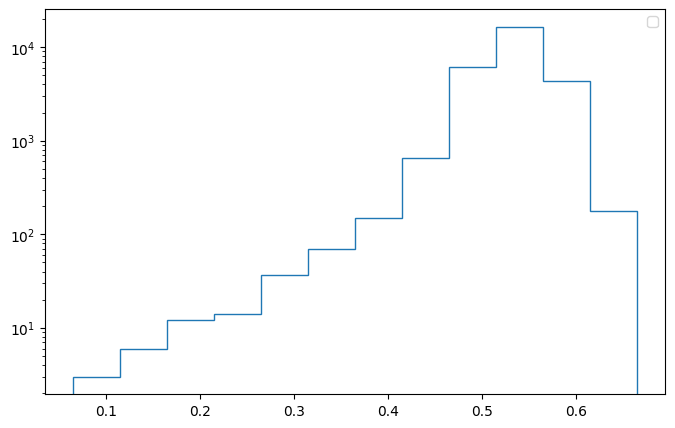

In [11]:
fig,ax = plt.subplots(figsize=(8,5))
ax.hist(df_idrome_conf.nu.values,
            bins=np.arange(df_idrome_conf.nu.min(),
                          df_idrome_conf.nu.max(),0.05),histtype='step')

ax.set_yscale('log')

In [17]:
df_idrome.columns

Index(['UniProt_ID', 'N', 'nu', 'SPR', 'ete2_Rg2', 'S', 'Delta', 'Rg/nm',
       'Ree/nm', 'Rh/nm', 'fK', 'fR', 'fE', 'fD', 'faro', 'mean_lambda', 'shd',
       'scd', 'kappa', 'fcr', 'ncpr', 'fasta', 'is_btw_folded', 'is_nterm',
       'is_cterm', 'is_idp', 'first', 'last', 'N_FL', 'protein_name',
       'gene_name', 'QCDpred', 'z_delta_+-', 'z_omega_pi', 'z_omega_+',
       'z_omega_-', 'z_omega_h', 'fdomain', 'nu_svr', 'SPR_svr'],
      dtype='object')

In [11]:
599/28058

0.021348634970418418

In [88]:
rg_array_temp = np.load(example_dir+'/rg.npy')

In [94]:
np.mean(rg_array_temp)

1.6180889337763165

In [95]:
rs_array_temp = np.load(example_dir+'/rs.npy')

In [98]:
rs_array_temp

array([0.67265445, 0.92137206, 1.14125979, 1.33929813, 1.5201956 ,
       1.68693686, 1.84178746, 1.98696065, 2.12517333, 2.25660038,
       2.38179564, 2.50209093, 2.61752439, 2.72911   , 2.8361733 ,
       2.9386282 , 3.03717852, 3.13218069, 3.22434688, 3.31320167,
       3.39981389, 3.48422813, 3.56627512, 3.64597702, 3.72359514,
       3.79914761, 3.87247801, 3.94368887, 4.01251173, 4.07814693,
       4.14029646, 4.2028203 ])

In [80]:
example_dir = seq_name_dir_df[seq_name_dir_df.seq_name=='A0A3B3IT52_1_34'].seq_dir.values[0]
pd.read_csv(example_dir+'/analysis.csv')

,Unnamed: 0,value,error
0,nu,0.577191,0.005069
1,S,0.943401,0.077595
2,Delta,0.214299,0.013852
3,SPR,10.468680,0.000000
4,ete2_Rg2,6.525359,0.158362
5,Rg,1.617382,0.009415
6,ete,3.956746,0.044813
7,R0,0.566384,0.008924


In [69]:
df_idrome_conf.loc['A0A3B3IT52_1_34']

nu               0.577000
nu_err           0.005069
S                0.943401
S_err            0.077595
Delta            0.214299
Delta_err        0.013852
ete2_Rg2         6.525359
ete2_Rg2_err     0.158362
Rg               1.617382
Rg_err           0.009415
ete              3.956746
ete_err          0.044813
rh               1.412009
rh_err           0.003696
R0               0.566384
R0_err           0.008924
SPR             10.468680
SPR_err          0.000000
Name: A0A3B3IT52_1_34, dtype: float64

In [99]:
df_idrome#.loc['A0A3B3IT52_1_34']

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,z_omega_pi,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr,Rg,ete,rh
seq_name,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1_145_181,A0A024RBG1,37,0.558,10.284649,6.304027,0.933961,0.225950,1.606561,3.843011,1.403521,...,0.000000,0.000000,0.000000,-0.531910,0.000000,0.565,10.288,1.606561,3.843011,1.403521
A0A075B6T7_1_32,A0A075B6T7,32,0.525,10.092351,6.114494,0.901807,0.212670,1.448141,3.390487,1.308675,...,0.054230,-0.043142,0.000000,0.061436,0.000000,0.532,10.107,1.448141,3.390487,1.308675
A0A087WTH1_1_67,A0A087WTH1,67,0.532,10.160125,6.069995,0.822738,0.199126,2.243991,5.283533,1.849274,...,0.000000,0.384885,2.281943,1.092688,0.298507,0.537,10.167,2.243991,5.283533,1.849274
A0A087WTH5_1_132,A0A087WTH5,132,0.496,10.049124,6.150972,0.798438,0.188978,3.034005,7.119714,2.471343,...,-0.463316,0.799692,0.000000,0.627563,0.000000,0.509,10.018,3.034005,7.119714,2.471343
A0A087WV53_1_46,A0A087WV53,46,0.567,10.212765,6.439589,0.882210,0.214786,1.882622,4.607908,1.582147,...,0.000000,1.947253,0.000000,0.090132,0.369565,0.578,10.316,1.882622,4.607908,1.582147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Z4_1_181,Q9Y6Z4,181,0.493,10.006512,5.748098,0.799905,0.210890,3.791956,8.607822,2.953329,...,0.000000,-1.319891,0.000000,0.163169,0.000000,0.520,9.993,3.791956,8.607822,2.953329
Q9Y6Z5_1_254,Q9Y6Z5,254,0.528,9.830710,6.153759,0.896173,0.221422,4.586832,10.808776,3.457226,...,0.000000,-2.182869,0.000000,2.214949,0.000000,0.537,9.984,4.586832,10.808776,3.457226
Q9Y6Z7_1_109,Q9Y6Z7,109,0.546,10.025622,6.175505,0.935857,0.216970,3.011145,7.113405,2.351117,...,0.000000,0.451957,2.132808,1.114749,0.513761,0.513,10.072,3.011145,7.113405,2.351117


In [80]:
np.mean(np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy')**2)/np.mean(np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/rg.npy')**2)

5.702845567857474

In [84]:
np.mean(np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy'))

5.3319187

In [112]:
df_idrome.loc['Q99457_1_97']

UniProt_ID                                                  Q99457
N                                                               97
nu                                                             0.4
SPR                                                      10.098006
ete2_Rg2                                                  5.713866
S                                                         0.850403
Delta                                                     0.198804
Rg/nm                                                     2.386679
Ree/nm                                                    5.348778
Rh/nm                                                     2.032433
fK                                                        0.030928
fR                                                        0.082474
fE                                                        0.082474
fD                                                        0.041237
faro                                                      0.03

['IDROME_larsen/IDRome_v4/P3/56/80/183_233',
 'IDROME_larsen/IDRome_v4/O6/02/24/77_188',
 'IDROME_larsen/IDRome_v4/Q8/TA/T2/148_258',
 'IDROME_larsen/IDRome_v4/Q9/Y5/B0/52_82',
 'IDROME_larsen/IDRome_v4/Q9/NZ/38/1_188',
 'IDROME_larsen/IDRome_v4/Q0/33/95/309_351',
 'IDROME_larsen/IDRome_v4/Q1/27/91/693_809',
 'IDROME_larsen/IDRome_v4/Q9/6R/L1/120_283',
 'IDROME_larsen/IDRome_v4/Q6/ZS/81/2071_2231',
 'IDROME_larsen/IDRome_v4/P2/70/37/1_33']

In [7]:
exec(open("pyconformap_modified.py").read())
def generate_2d_map(seq_name):
    location_of_files = seq_name_dir_df[seq_name_dir_df.seq_name==seq_name].seq_dir.values[0]    
    rg2_value = np.load(location_of_files+'/rg.npy')**2
    ree2_value = np.load(location_of_files+'/ete.npy')**2
    pd.DataFrame(zip(rg2_value,ree2_value),columns=['Rg2','Ree2']).to_csv(seq_name+'.csv',index=False)
    map_2d_seq_name = PyConforMap(seq_name+'.csv')
    map_2d_seq_name.plot_protein_against_GW(seq_name+'.csv')
    os.remove(seq_name+'.csv')
    return 

# generate 10 random plots of IDRs from the dataset

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


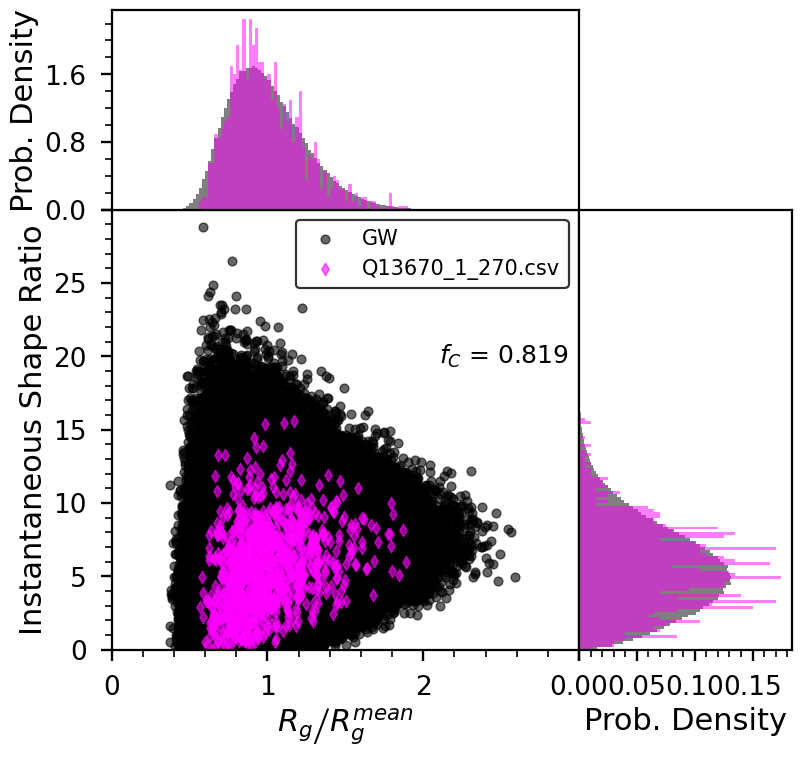

In [19]:
generate_2d_map(rd.sample(list(seq_name_dir_df.seq_name.values),1)[0])    

# look at specific IDR using pyconformap

In [102]:
seq_name_dir_df[seq_name_dir_df.seq_name=='Q9Y6Z4_1_181']

,seq_name,seq_dir
21558,Q9Y6Z4_1_181,IDROME_larsen/IDRome_v4/Q9/Y6/Z4/1_181


In [106]:
Q9Y6Z4_1_181_Rs = np.load('IDROME_larsen/IDRome_v4/Q9/Y6/Z4/1_181/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/Q9/Y6/Z4/1_181/rg.npy')**2
Q9Y6Z4_1_181_Rg2 = np.load('IDROME_larsen/IDRome_v4/Q9/Y6/Z4/1_181/rg.npy')**2
Q9Y6Z4_1_181_Ree2 = np.load('IDROME_larsen/IDRome_v4/Q9/Y6/Z4/1_181/ete.npy')**2
pd.DataFrame(zip(Q9Y6Z4_1_181_Rg2,Q9Y6Z4_1_181_Ree2),columns=['Rg2','Ree2']).to_csv('Q9Y6Z4_1_181.csv',index=False)

In [107]:
map_2d_Q9Y6Z4_1_181 = PyConforMap('Q9Y6Z4_1_181.csv')

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


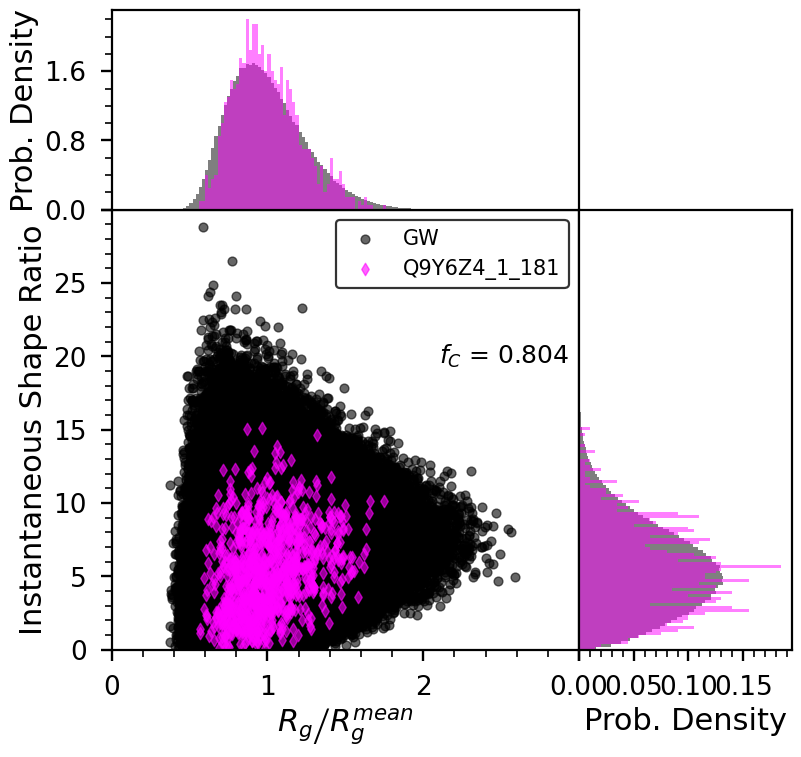

In [109]:
map_2d_Q9Y6Z4_1_181.plot_protein_against_GW('Q9Y6Z4_1_181')

In [38]:
Q99457_1_97_Rs = np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/rg.npy')**2
Q99457_1_97_Rg2 = np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/rg.npy')**2
Q99457_1_97_Ree2 = np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy')**2
pd.DataFrame(zip(Q99457_1_97_Rg2,Q99457_1_97_Ree2),columns=['Rg2','Ree2']).to_csv('Q99457_1_97.csv',index=False)

In [42]:
map_2d_Q99457_1_97 = PyConforMap('Q99457_1_97.csv')

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


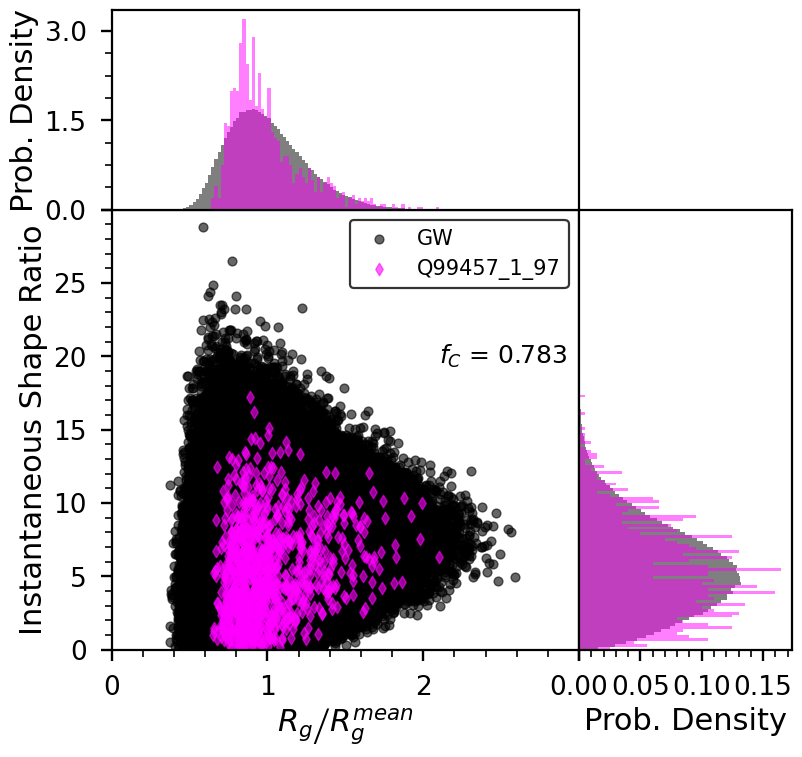

In [43]:
map_2d_Q99457_1_97.plot_protein_against_GW('Q99457_1_97')

this might take a couple of minutes
if it takes too long to run, please consider a lower no_dots value (default set at 20)


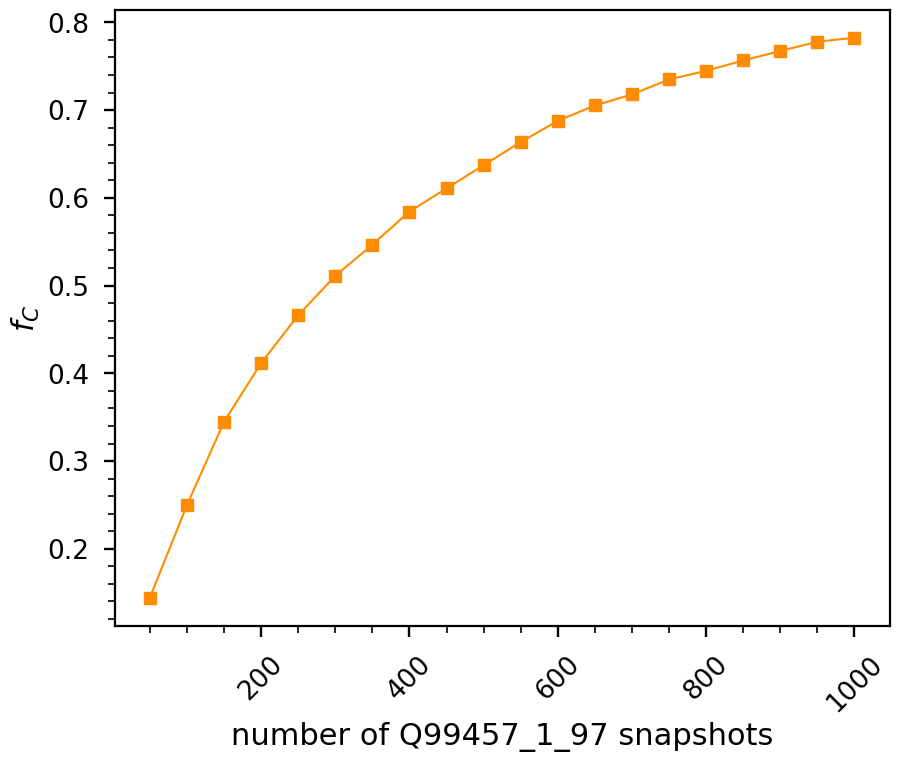

In [41]:
map_2d_Q99457_1_97.vary_protein('Q99457_1_97')

In [50]:
df_idrome[df_idrome.fdomain>=0.8]

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,gene_name,QCDpred,z_delta_+-,z_omega_pi,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr
seq_name,,,,,,,,,,,,,,,,,,,,,
A0A1B0GV03_209_249,A0A1B0GV03,41,0.571,10.454303,6.498190,0.934337,0.226920,1.843086,4.491087,1.556355,...,GOLGA6L7,0.106202,-1.14479,0.000000,-0.078698,0.923740,-2.326676,0.975610,0.547,10.336
A0A1B0GVH4_1_220,A0A1B0GVH4,220,0.472,9.945163,5.895987,0.760346,0.216295,3.847408,8.838498,3.090717,...,PRSS51,0.457748,0.00000,0.000000,1.441585,0.000000,1.807514,0.895455,0.504,9.962
A0A1B0GVS7_1_189,A0A1B0GVS7,189,0.533,10.126613,6.214737,0.854391,0.216503,4.187725,9.967685,3.174457,...,MDFIC2,0.262588,0.00000,0.000000,0.000000,-0.362462,-0.019548,0.846561,0.546,10.094
A0A1B0GVX0_1_72,A0A1B0GVX0,72,0.509,10.054329,6.034974,0.844846,0.201371,2.223540,5.190548,1.859103,...,LITAFD,0.875869,0.00000,0.202329,0.000000,0.000000,-1.453199,0.972222,0.524,10.016
A0FGR9_449_488,A0FGR9,40,0.536,10.207801,6.276624,0.902614,0.203306,1.677957,3.983023,1.469749,...,ESYT3,0.252935,0.00000,-0.178603,0.751360,0.000000,-1.734876,0.975000,0.530,10.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6I4_273_309,Q9Y6I4,37,0.562,10.148140,6.439653,0.913397,0.216953,1.609346,3.918793,1.409948,...,USP3,0.322493,0.00000,0.000000,0.000000,0.000000,-0.970551,0.972973,0.553,10.253
Q9Y6Q2_563_619,Q9Y6Q2,57,0.525,10.223712,6.319621,0.928919,0.219760,2.056536,4.892311,1.737282,...,STON1,0.557385,0.00000,0.000000,1.524884,0.000000,-1.940226,0.982456,0.529,10.174
Q9Y6S9_230_386,Q9Y6S9,157,0.521,9.966080,6.047843,0.901630,0.192483,3.573470,8.391120,2.760214,...,RPS6KL1,0.134408,0.00000,0.000000,-1.049240,0.000000,0.482885,0.993631,0.515,10.004


In [46]:
A0A1B0GV03_209_249_Rs = np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/rg.npy')**2
A0A1B0GV03_209_249_Rg2 = np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/rg.npy')**2
A0A1B0GV03_209_249_Ree2 = np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/ete.npy')**2
pd.DataFrame(zip(A0A1B0GV03_209_249_Rg2,A0A1B0GV03_209_249_Ree2),columns=['Rg2','Ree2']).to_csv('A0A1B0GV03_209_249.csv',index=False)

In [45]:
map_2d_A0A1B0GV03_209_249 = PyConforMap('A0A1B0GV03_209_249.csv')

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


In [46]:
map_2d_A0A1B0GV03_209_249.bounded_fraction

1.0

In [49]:
map_2d_A0A1B0GV03_209_249.plot_protein_against_GW('A0A1B0GV03_209_249')
plt.close()

In [50]:
map_2d_A0A1B0GV03_209_249.fC_value

0.7850194444444445

In [57]:

O75093_1109_1146_Rs = np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/rg.npy')**2
O75093_1109_1146_Rg2 = np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/rg.npy')**2
O75093_1109_1146_Ree2 = np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/ete.npy')**2
pd.DataFrame(zip(O75093_1109_1146_Rg2,O75093_1109_1146_Ree2),columns=['Rg2','Ree2']).to_csv('O75093_1109_1146.csv',index=False)

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


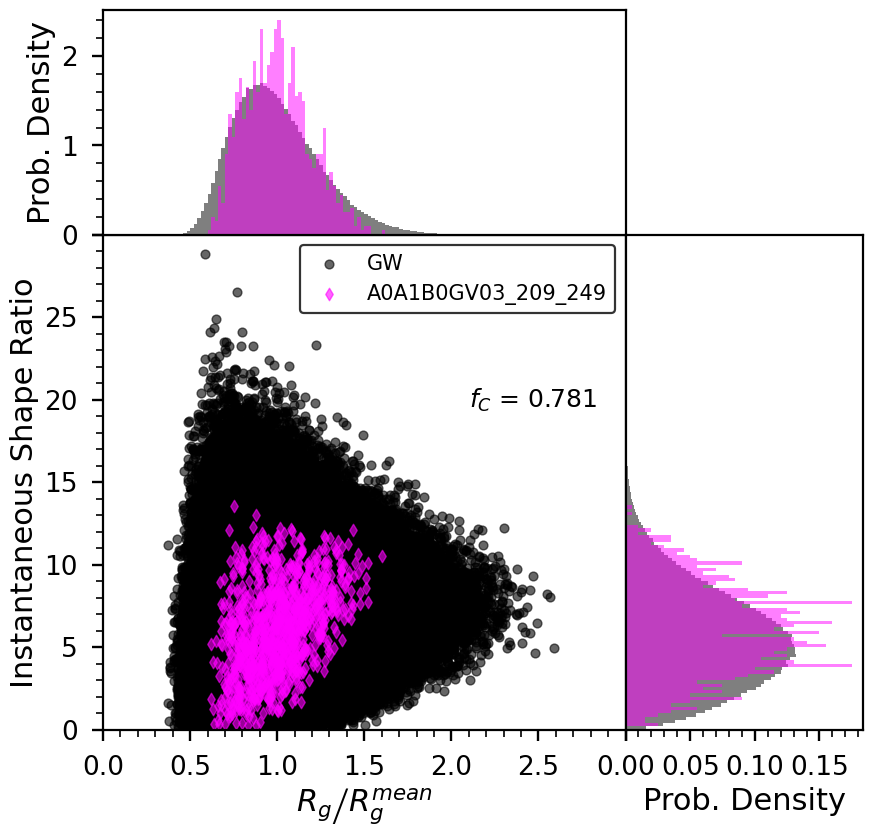

In [58]:
map_2d_O75093_1109_1146 = PyConforMap('O75093_1109_1146.csv')
map_2d_O75093_1109_1146.plot_protein_against_GW('A0A1B0GV03_209_249')

In [99]:
%%time
map_2d_O75093_1109_1146 = PyConforMap('O75093_1109_1146.csv')
map_2d_O75093_1109_1146.fC_using_cdist(upto_protein_snapshots = map_2d_O75093_1109_1146.protein_rg2.shape[0],
                                       GW_every_ith_snap=map_2d_O75093_1109_1146.GW_df.shape[0],protein_name='O75093_1109_1146.csv')


100.00% of protein/polymer snapshots are close to at least 1 GW snapshot
CPU times: user 4.73 s, sys: 36.9 ms, total: 4.77 s
Wall time: 4.78 s


0.7814513888888889

In [101]:
((4.78 * 28058)/60)/60

37.254788888888896